In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv('./vgsales_ml.csv')
data.head()

,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,2,NES,1985.0,Pltform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,5,GB,1996.0,Role_Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
len(data.Genre.unique())

12

In [4]:
data.Genre.value_counts()

Action          3251
Sports          2304
Misc            1686
Role_Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Pltform          875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [5]:
data = data[['Rank','Global_Sales','Genre']]
data.head()

,Rank,Global_Sales,Genre
0,1,82.74,Sports
1,2,40.24,Pltform
2,3,35.82,Racing
3,4,33.00,Sports
4,5,31.37,Role_Playing


In [6]:
datadumm = pd.get_dummies(data=data, columns=['Genre'])
datadumm.head()

,Rank,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Pltform,Genre_Puzzle,Genre_Racing,Genre_Role_Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,1,82.74,0,0,0,0,0,0,0,0,0,0,1,0
1,2,40.24,0,0,0,0,1,0,0,0,0,0,0,0
2,3,35.82,0,0,0,0,0,0,1,0,0,0,0,0
3,4,33.00,0,0,0,0,0,0,0,0,0,0,1,0
4,5,31.37,0,0,0,0,0,0,0,1,0,0,0,0


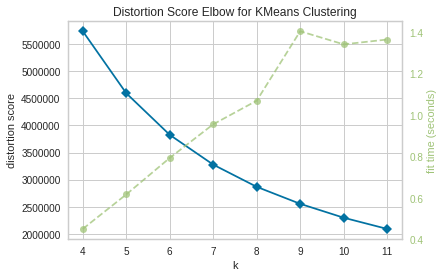

In [7]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(datadumm)
visualizer.poof()

In [9]:
kmeans = KMeans(n_clusters=6)

In [10]:
data_group = datadumm.groupby(['Rank','Global_Sales']).sum()
data_group.head()

,,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Pltform,Genre_Puzzle,Genre_Racing,Genre_Role_Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
Rank,Global_Sales,,,,,,,,,,,,
1,82.74,0,0,0,0,0,0,0,0,0,0,1,0
2,40.24,0,0,0,0,1,0,0,0,0,0,0,0
3,35.82,0,0,0,0,0,0,1,0,0,0,0,0
4,33.00,0,0,0,0,0,0,0,0,0,0,1,0
5,31.37,0,0,0,0,0,0,0,1,0,0,0,0


In [11]:
data_group.reset_index(level=['Global_Sales'], inplace=True)

In [12]:
data_group.Global_Sales.value_counts().head()

0.02    1045
0.03     795
0.04     634
0.05     624
0.01     600
Name: Global_Sales, dtype: int64

In [13]:
pca = PCA(n_components=6)

principalComponents = pca.fit_transform(data_group)
principalDf = pd.DataFrame(data = principalComponents
             ,columns = ['pc1', 'pc2', 'pc3', 'pc4','pc5','pc6'])
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,82.186325,-0.314704,0.658650,0.405620,-0.123006,1.135858
1,39.701191,-0.075516,-0.200177,0.065420,-0.179620,0.573243
2,35.274533,-0.108397,-0.246865,-0.033576,-0.348758,0.595580
3,32.455043,-0.382477,0.739727,0.215706,-0.015505,0.445720
4,30.826996,-0.140679,-0.313898,-0.352419,0.693953,0.399118


In [14]:
kmeans = KMeans(n_clusters=6)
data_clusters = kmeans.fit(principalDf)
data_clusters.cluster_centers_

array([[-2.79102873e-01, -2.06689076e-01, -3.57027785e-02,
        -8.77637838e-03, -6.74969568e-03,  5.28113161e-03],
       [ 2.49708910e+01, -7.09992427e-02, -8.46617440e-02,
         1.03068629e-01,  7.93285676e-03,  3.23777327e-01],
       [ 2.00832778e+00, -2.53234147e-02,  8.11431590e-03,
        -5.71230733e-03,  1.36705904e-03, -4.31786836e-02],
       [ 8.21863250e+01, -3.14704208e-01,  6.58650017e-01,
         4.05620370e-01, -1.23005590e-01,  1.13585843e+00],
       [-2.44375075e-01,  8.27313756e-01,  1.43036241e-01,
         3.82475333e-02,  2.70199477e-02, -5.11131537e-03],
       [ 8.44524110e+00,  1.98755072e-02, -1.06128720e-01,
        -5.14062005e-02, -2.02110197e-02, -4.15465831e-02]])

In [15]:
data_group['labels'] = data_clusters.fit_predict(principalDf)
data_group.reset_index('Rank', inplace=True)
data_merged = pd.merge(data, data_group[['Rank', 'labels']], on='Rank', how='outer')
data_merged.head()

,Rank,Global_Sales,Genre,labels
0,1,82.74,Sports,3
1,2,40.24,Pltform,4
2,3,35.82,Racing,4
3,4,33.00,Sports,4
4,5,31.37,Role_Playing,4


In [16]:
data_merged.labels.value_counts()

0    12838
5     2151
1     1153
2      127
4       21
3        1
Name: labels, dtype: int64

In [19]:
pd.crosstab(data_group.Global_Sales,data_group.labels).head()

labels,0,1,2,3,4,5
Global_Sales,,,,,,
0.01,551,0,0,0,0,49
0.02,963,0,0,0,0,82
0.03,728,0,0,0,0,67
0.04,566,0,0,0,0,68
0.05,544,0,0,0,0,80


In [18]:
a = data_merged.groupby(['labels']).Genre.value_counts()
b = a.to_frame("counts").reset_index()
b.set_index("Genre", inplace=True)
b.groupby('labels').counts.nlargest(5)

labels  Genre       
0       Action          2985
        Misc            1568
        Role_Playing    1330
        Adventure       1249
        Racing          1124
1       Action           242
        Sports           142
        Shooter          140
        Role_Playing     118
        Pltform          113
2       Shooter           30
        Action            22
        Role_Playing      19
        Pltform           17
        Racing            12
3       Sports             1
4       Pltform            5
        Misc               3
        Role_Playing       3
        Sports             3
        Action             2
5       Sports          2151
Name: counts, dtype: int64

In [21]:
data_merged.to_csv('rs.csv')